In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append("/dybfs/users/xuhangkun/SimTAO/offline")
from config import detector_info
import ROOT

Welcome to JupyROOT 6.22/06


In [2]:
def resolution(data,energy_list=range(9),add_edep=1.022):
    cor_res = []
    uncor_res = []
    cor_evis = []
    uncor_evis = []
    for e in energy_list:
        tmp_data = data[data["edep"] > (e + add_edep)*0.9998]
        tmp_data = tmp_data[data["edep"] < (e + add_edep)*1.0002]
        tmp_data = tmp_data.reset_index(drop=True)
        true_hit = tmp_data["true_hit"].to_numpy()
        cor_hit = tmp_data["cor_hit"].to_numpy()
        true_hist = ROOT.TH1F("true_hist","true_hist",100,min(true_hit)-10,max(true_hit)+10)
        cor_hist = ROOT.TH1F("cor_hist","cor_hist",100,min(cor_hit)-10,max(cor_hit)+10)
        for true,cor in zip(true_hit,cor_hit):
            true_hist.Fill(true)
            cor_hist.Fill(cor)
        true_hist.Fit("gaus")
        true_mean = true_hist.GetFunction("gaus").GetParameter(1)
        true_std = true_hist.GetFunction("gaus").GetParameter(2)
        cor_hist.Fit("gaus")
        cor_mean = cor_hist.GetFunction("gaus").GetParameter(1)
        cor_std = cor_hist.GetFunction("gaus").GetParameter(2)
        cor_res.append(cor_std/cor_mean)
        uncor_res.append(true_std/true_mean)
        cor_evis.append(cor_mean/detector_info["energy_scale"])
        uncor_evis.append(true_mean/detector_info["energy_scale"])
        del true_hist
        del cor_hist
    return np.array(cor_evis),np.array(uncor_evis),np.array(cor_res),np.array(uncor_res)

## Reconstruction by ref map

In [4]:
center_positron_ref = pd.read_csv("../data/reconstruction/center_positron_reconstruction_by_ref_map.csv")
uni_positron_ref = pd.read_csv("../data/reconstruction/uni_positron_reconstruction_by_ref_map.csv")
center_cor_evis,center_uncor_evis,center_cor,center_uncor = resolution(center_positron_ref)
uni_cor_evis,uni_uncor_evis,uni_cor,uni_uncor = resolution(uni_positron_ref)

e reindexed to match DataFrame index.
  
/dybfs/users/xuhangkun/SOFTWARE/VSCode/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/dybfs/users/xuhangkun/SOFTWARE/VSCode/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/dybfs/users/xuhangkun/SOFTWARE/VSCode/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/dybfs/users/xuhangkun/SOFTWARE/VSCode/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/dybfs/users/xuhangkun/SOFTWARE/VSCode/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/dybfs/users/xuhangkun/SOFTWARE/VSCode/.local/lib/python3.6/site-pack

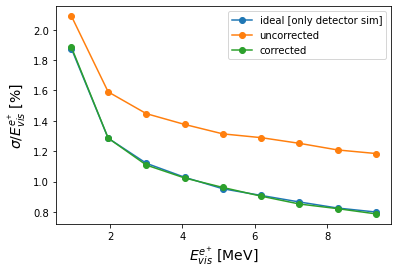

In [8]:
plt.plot(center_uncor_evis,100*center_uncor,"o-",label="ideal [only detector sim]")
plt.plot(center_uncor_evis,100*uni_uncor,"o-",label="uncorrected")
plt.plot(center_uncor_evis,100*uni_cor,"o-",label="corrected")
plt.legend()
plt.xlabel("$E_{vis}^{e^{+}}$ [MeV]",fontsize=14)
plt.ylabel("$\sigma/E_{vis}^{e^{+}}$ [%]",fontsize=14)
plt.show()

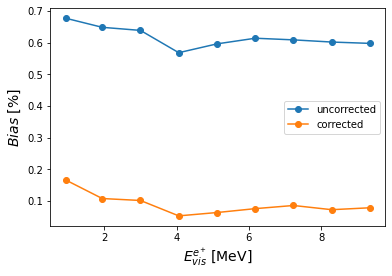

In [11]:
plt.plot(center_uncor_evis,100*(uni_uncor_evis-center_uncor_evis)/center_uncor_evis,"o-",label="uncorrected")
plt.plot(center_uncor_evis,100*(uni_cor_evis - center_uncor_evis)/center_uncor_evis,"o-",label="corrected")
plt.legend()
plt.xlabel("$E_{vis}^{e^{+}}$ [MeV]",fontsize=14)
plt.ylabel("$Bias$ [%]",fontsize=14)
plt.show()

## Reconstruction by gamma map

In [12]:
center_positron_gamma = pd.read_csv("../data/reconstruction/center_positron_reconstruction_by_gamma_map.csv")
uni_positron_gamma = pd.read_csv("../data/reconstruction/uni_positron_reconstruction_by_gamma_map.csv")
uni_positron_gamma_vs = pd.read_csv("../data/reconstruction/uni_positron_reconstruction_by_gamma_map_vertex_smear.csv")
center_cor_evis,center_uncor_evis,center_cor,center_uncor = resolution(center_positron_gamma)
uni_cor_evis,uni_uncor_evis,uni_cor,uni_uncor = resolution(uni_positron_gamma)
uni_cor_evis_vs,uni_uncor_evis_vs,uni_cor_vs,uni_uncor_vs = resolution(uni_positron_gamma_vs)

      SIZE      DERIVATIVE 
   1  Constant     1.28589e+03   8.45297e+00   7.89292e-02   3.26884e-07
   2  Mean         3.69361e+04   1.72679e+00   1.86513e-02  -3.68474e-06
   3  Sigma        3.03477e+02   1.17045e+00   1.12293e-05  -3.21619e-03
 FCN=548.567 FROM MIGRAD    STATUS=CONVERGED      56 CALLS          57 TOTAL
                     EDM=3.67875e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.31170e+03   8.66511e+00   8.05259e-02   1.09821e-04
   2  Mean         4.16452e+04   1.89563e+00   2.04584e-02   1.94849e-04
   3  Sigma        3.32900e+02   1.28606e+00   1.12457e-05   4.34656e-01
 FCN=580.062 FROM MIGRAD    STATUS=CONVERGED      58 CALLS          59 TOTAL
                     EDM=8.6415e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.

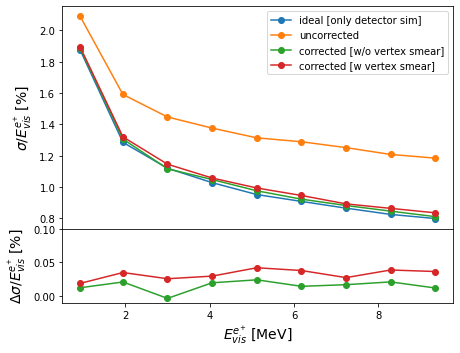

In [23]:
from matplotlib import gridspec
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',   # 使用颜色编码定义颜色
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.figure(figsize=(7,8))
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 
gs0 = gridspec.GridSpecFromSubplotSpec(2, 1, height_ratios=[3, 1],subplot_spec=gs[0],hspace=0)
plt.subplot(gs0[0])
plt.plot(center_uncor_evis,100*center_uncor,"o-",label="ideal [only detector sim]",color=colors[0])
plt.plot(center_uncor_evis,100*uni_uncor,"o-",label="uncorrected",color=colors[1])
plt.plot(center_uncor_evis,100*uni_cor,"o-",label="corrected [w/o vertex smear]",color=colors[2])
plt.plot(center_uncor_evis,100*uni_cor_vs,"o-",label="corrected [w vertex smear]",color=colors[3])
plt.legend()
plt.ylabel("$\sigma/E_{vis}^{e^{+}}$ [%]",fontsize=14)
plt.subplot(gs0[1])
plt.plot(center_uncor_evis,100*(uni_cor-center_uncor),"o-",label="corrected [w/o vertex smear]",color=colors[2])
plt.plot(center_uncor_evis,100*(uni_cor_vs-center_uncor),"o-",label="corrected [w vertex smear]",color=colors[3])
plt.xlabel("$E_{vis}^{e^{+}}$ [MeV]",fontsize=14)
plt.ylabel("$\Delta\sigma/E_{vis}^{e^{+}}$ [%]",fontsize=14)
plt.ylim(-0.01,0.1)
plt.show()

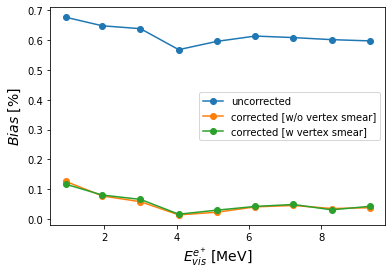

In [14]:
plt.plot(center_uncor_evis,100*(uni_uncor_evis-center_uncor_evis)/center_uncor_evis,"o-",label="uncorrected")
plt.plot(center_uncor_evis,100*(uni_cor_evis - center_uncor_evis)/center_uncor_evis,"o-",label="corrected [w/o vertex smear]")
plt.plot(center_uncor_evis,100*(uni_cor_evis_vs - center_uncor_evis)/center_uncor_evis,"o-",label="corrected [w vertex smear]")
plt.legend()
plt.xlabel("$E_{vis}^{e^{+}}$ [MeV]",fontsize=14)
plt.ylabel("$Bias$ [%]",fontsize=14)
plt.show()